In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv("cardio_train.csv", sep=";")

In [7]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [13]:
X = df.drop(["cardio", "id"], axis=1)
Y = df["cardio"]

### Train and test the model

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#this is for splitting data into train and test 80% train and 20% test and also for avoid overfitting we use random_state=42
#state=42 means that the random number generator will produce the same sequence of numbers each time you run the code.

### Scale the data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#standarScalar is used to standardize features by removing the mean and scaling to unit variance.

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
# logistic regression is used for binary classification problem

LogisticRegression()

### Predict logistic Model

In [18]:
Y_pred_log = log_model.predict(X_test)

### Evaluate Logistic Model

In [19]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_log))
print(confusion_matrix(Y_test, Y_pred_log))
print(classification_report(Y_test, Y_pred_log))
#confusion matrix is used to evaluate the performance of a classification algorithm
#classification report is used to evaluate the precision, recall, f1-score of the model
#precision is the ratio of correctly predicted positive observations to the total predicted positives.
#recall is the ratio of correctly predicted positive observations to all actual positives.
#f1-score is the weighted average of precision and recall.

Accuracy: 0.7235714285714285
[[5362 1626]
 [2244 4768]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [20]:
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.7193214285714286
Testing Accuracy: 0.7235714285714285


In [21]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
# C → Controls how strict the model is. Smaller C = stronger regularization.
#     We test 0.01, 0.1, 1, and 10 to see which gives best accuracy.
# penalty → Type of regularization. We use L2 because it is stable and works well.
# solver → The algorithm used to train logistic regression.
#     'lbfgs' → fast and stable, good for small to medium data.
#     'liblinear' → best for binary classification problems.

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7190714285714285


### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42);
rf.fit(X_train, Y_train)

#n_estimators is the number of trees in the forest
#max_depth is the maximum depth of the tree
#random_state is used for reproducibility

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

### Predict using random forest

In [28]:
Y_pred_rf = rf.predict(X_test)

In [29]:
print("RF Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))

RF Accuracy: 0.7402857142857143
[[5521 1467]
 [2169 4843]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



## Visualization

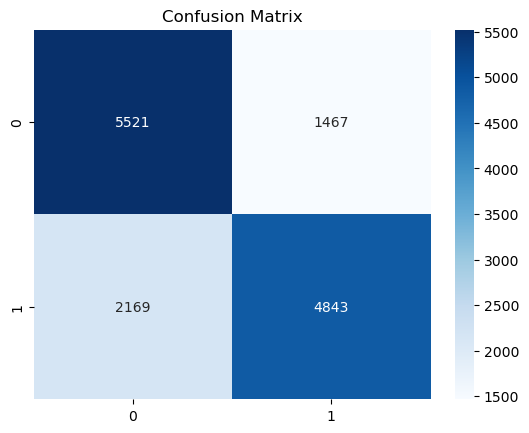

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, Y_pred_rf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## ROC curve

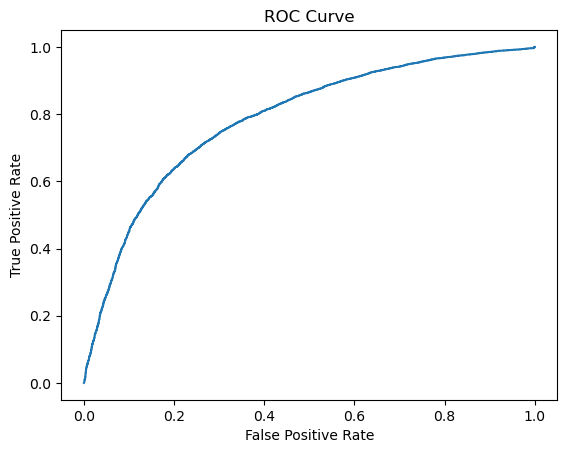

In [33]:
from sklearn.metrics import roc_curve, auc

Y_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [34]:
import pickle
import os
#pickle is used for serializing and deserializing a Python object structure.

# Create model folder if not exists
if not os.path.exists("model"):
    os.makedirs("model")

# Save Random Forest model
pickle.dump(rf, open("model/model.pkl", "wb"))

# Save scaler used during training
pickle.dump(scaler, open("model/scaler.pkl", "wb"))

print("Random Forest model and scaler saved successfully!")

Random Forest model and scaler saved successfully!


In [35]:
print("Scaler expects:", scaler.n_features_in_)

Scaler expects: 11
